In [1]:
import matplotlib as mpl
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from retrospective_analysis.metrics import max_error, mean_difference
from retrospective_analysis.data_loading import load_dataframe, moving_average, add_baselines
from retrospective_analysis.evaluate_scenarios import compute_metrics, compute_metrics_all_scenarios, evaluate_all_scenarios

In [21]:
# to change with path suited for you 
results_path = 'results/'
images_path = 'images/'

# divide by 100 to express as % of normalization
new_hosp_normalization = 4200/100 
icu_normalization = 7000/100 

metrics = {"MAE": mean_absolute_error, "ME": mean_difference,  
           "Max Error": max_error}

data_location = {"2020/04/29": "https://raw.githubusercontent.com/evaluation-modelisation-covid/france/gh-pages/paper_models/data/2020_04_29/corrected_scenarios.csv",
        "2020/10/30": "processed_data/2020_10_30.csv",
        "2021/01/16": "processed_data/2021_01_16.csv",
        "2021/02/02": "processed_data/2021_02_02.csv",
        "2021/02/08": "processed_data/2021_02_08.csv",
        "2021/02/23": "processed_data/2021_02_23.csv",
        "2021/04/26": "processed_data/2021_04_26.csv",
        "2021/05/21": "processed_data/2021_05_21.csv",
        "2021/07/26": "processed_data/2021_07_26.csv",
        "2021/08/05": "processed_data/2021_08_05.csv",
        "2021/10/04": "processed_data/2021_10_04.csv",
        "2022/01/07": "processed_data/2022_01_07.csv"}

normalizations = {"2020/04/29": icu_normalization,
        "2020/10/30": icu_normalization,
        "2021/01/16": new_hosp_normalization,
        "2021/02/02": new_hosp_normalization,
        "2021/02/08": new_hosp_normalization,
        "2021/02/23": new_hosp_normalization,
        "2021/04/26": new_hosp_normalization,
        "2021/05/21": new_hosp_normalization,
        "2021/07/26": icu_normalization,
        "2021/08/05": icu_normalization,
        "2021/10/04": icu_normalization,
        "2022/01/07": icu_normalization}

scenario_endpoints = ["ICU", "ICU", "New hosp.", "New hosp.", "New hosp.",
                      "New hosp.", "New hosp.", "New hosp.",
                      "ICU", "ICU", "ICU", "ICU"]
endpoints_normalizations = {"ICU": 7000/100, 
                            "New hosp.": 4200/100}


In [3]:
# Set matplotlib style 
mpl.use("pgf")
mpl.rcParams.update({
    'font.family': 'serif',
    'axes.titlesize' : 25,
    'axes.labelsize' : 19,
    'legend.fontsize' : 18,
    'pgf.rcfonts': False,
    'figure.dpi': 300.0,
})

mpl.rcParams['axes.unicode_minus'] = False
sns.set(font_scale=1.5, style="white", 
        rc={
            'font.family': 'sans-serif',
            'axes.titlesize' : 25,
            'axes.labelsize' : 22,
            'legend.fontsize' : 15,
            'xtick.labelsize' : 17,
            'ytick.labelsize' : 17,
            'xtick.bottom': True,
            'ytick.left': True,
            'figure.dpi': 300.0,
})
%matplotlib inline

In [30]:
df_low_scenario = compute_metrics_all_scenarios(data_location, metrics=metrics, normalizations=normalizations)
df_low_scenario["endpoints"] = scenario_endpoints
df_low_scenario["MAE (beds)"] = df_low_scenario["MAE"].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])
df_low_scenario["Max error (beds)"] = df_low_scenario['Max Error'].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])

print(df_low_scenario.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format)) 

\begin{tabular}{lrrrrlrr}
\toprule
{} &  MAE &    ME &  Max Error &  MAPE &  endpoints &  MAE (beds) &  Max error (beds) \\
\midrule
Scenario: 2020/04/29 &  1.4 &  -0.5 &        2.7 &  19.3 &        ICU &        98.0 &             189.0 \\
Scenario: 2020/10/30 &  8.0 &   0.5 &       18.5 &  15.2 &        ICU &       560.0 &            1295.0 \\
Scenario: 2021/01/16 & 29.2 &  -0.7 &       45.3 &  13.9 &  New hosp. &      1226.4 &            1902.6 \\
Scenario: 2021/02/02 & 32.9 &  32.9 &       58.2 &  16.6 &  New hosp. &      1381.8 &            2444.4 \\
Scenario: 2021/02/08 &  7.9 &   7.9 &        9.8 &  26.8 &  New hosp. &       331.8 &             411.6 \\
Scenario: 2021/02/23 &  5.6 &  -5.2 &        8.3 &  17.8 &  New hosp. &       235.2 &             348.6 \\
Scenario: 2021/04/26 &  5.1 &   5.1 &        7.1 &  65.9 &  New hosp. &       214.2 &             298.2 \\
Scenario: 2021/05/21 & 10.6 & -10.6 &       15.0 &  24.4 &  New hosp. &       445.2 &             630.0 \\
Scenario: 2

/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_26975/1618075495.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_low_scenario.to_latex(


In [28]:
df_median_scenario = compute_metrics_all_scenarios(data_location, metrics=metrics, normalizations=normalizations, scenario_name="median")
df_median_scenario["endpoints"] = scenario_endpoints
df_median_scenario["MAE (beds)"] = df_median_scenario["MAE"].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])
df_median_scenario["Max error (beds)"] = df_median_scenario['Max Error'].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])

print(df_median_scenario.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format)) 

\begin{tabular}{lrrrrlrr}
\toprule
{} &   MAE &    ME &  Max Error &  MAPE &  endpoints &  MAE (beds) &  Max error (beds) \\
\midrule
Scenario: 2020/04/29 &   2.9 &   1.1 &       11.1 &  50.0 &        ICU &       203.0 &             777.0 \\
Scenario: 2020/10/30 &  24.5 &  24.5 &       34.8 &  47.2 &        ICU &      1715.0 &            2436.0 \\
Scenario: 2021/01/16 & 124.7 & 116.9 &      334.3 &  62.7 &  New hosp. &      5237.4 &           14040.6 \\
Scenario: 2021/02/02 & 116.4 & 116.4 &      256.4 &  58.7 &  New hosp. &      4888.8 &           10768.8 \\
Scenario: 2021/02/08 &  19.3 &  19.3 &       25.6 &  64.7 &  New hosp. &       810.6 &            1075.2 \\
Scenario: 2021/02/23 &   8.1 &   3.7 &       29.7 &  22.6 &  New hosp. &       340.2 &            1247.4 \\
Scenario: 2021/04/26 &  12.7 &  12.7 &       19.3 & 221.1 &  New hosp. &       533.4 &             810.6 \\
Scenario: 2021/05/21 &   9.2 &  -9.1 &       15.6 &  19.4 &  New hosp. &       386.4 &             655.2 \\
Sc

/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_26975/4113351954.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_median_scenario.to_latex(


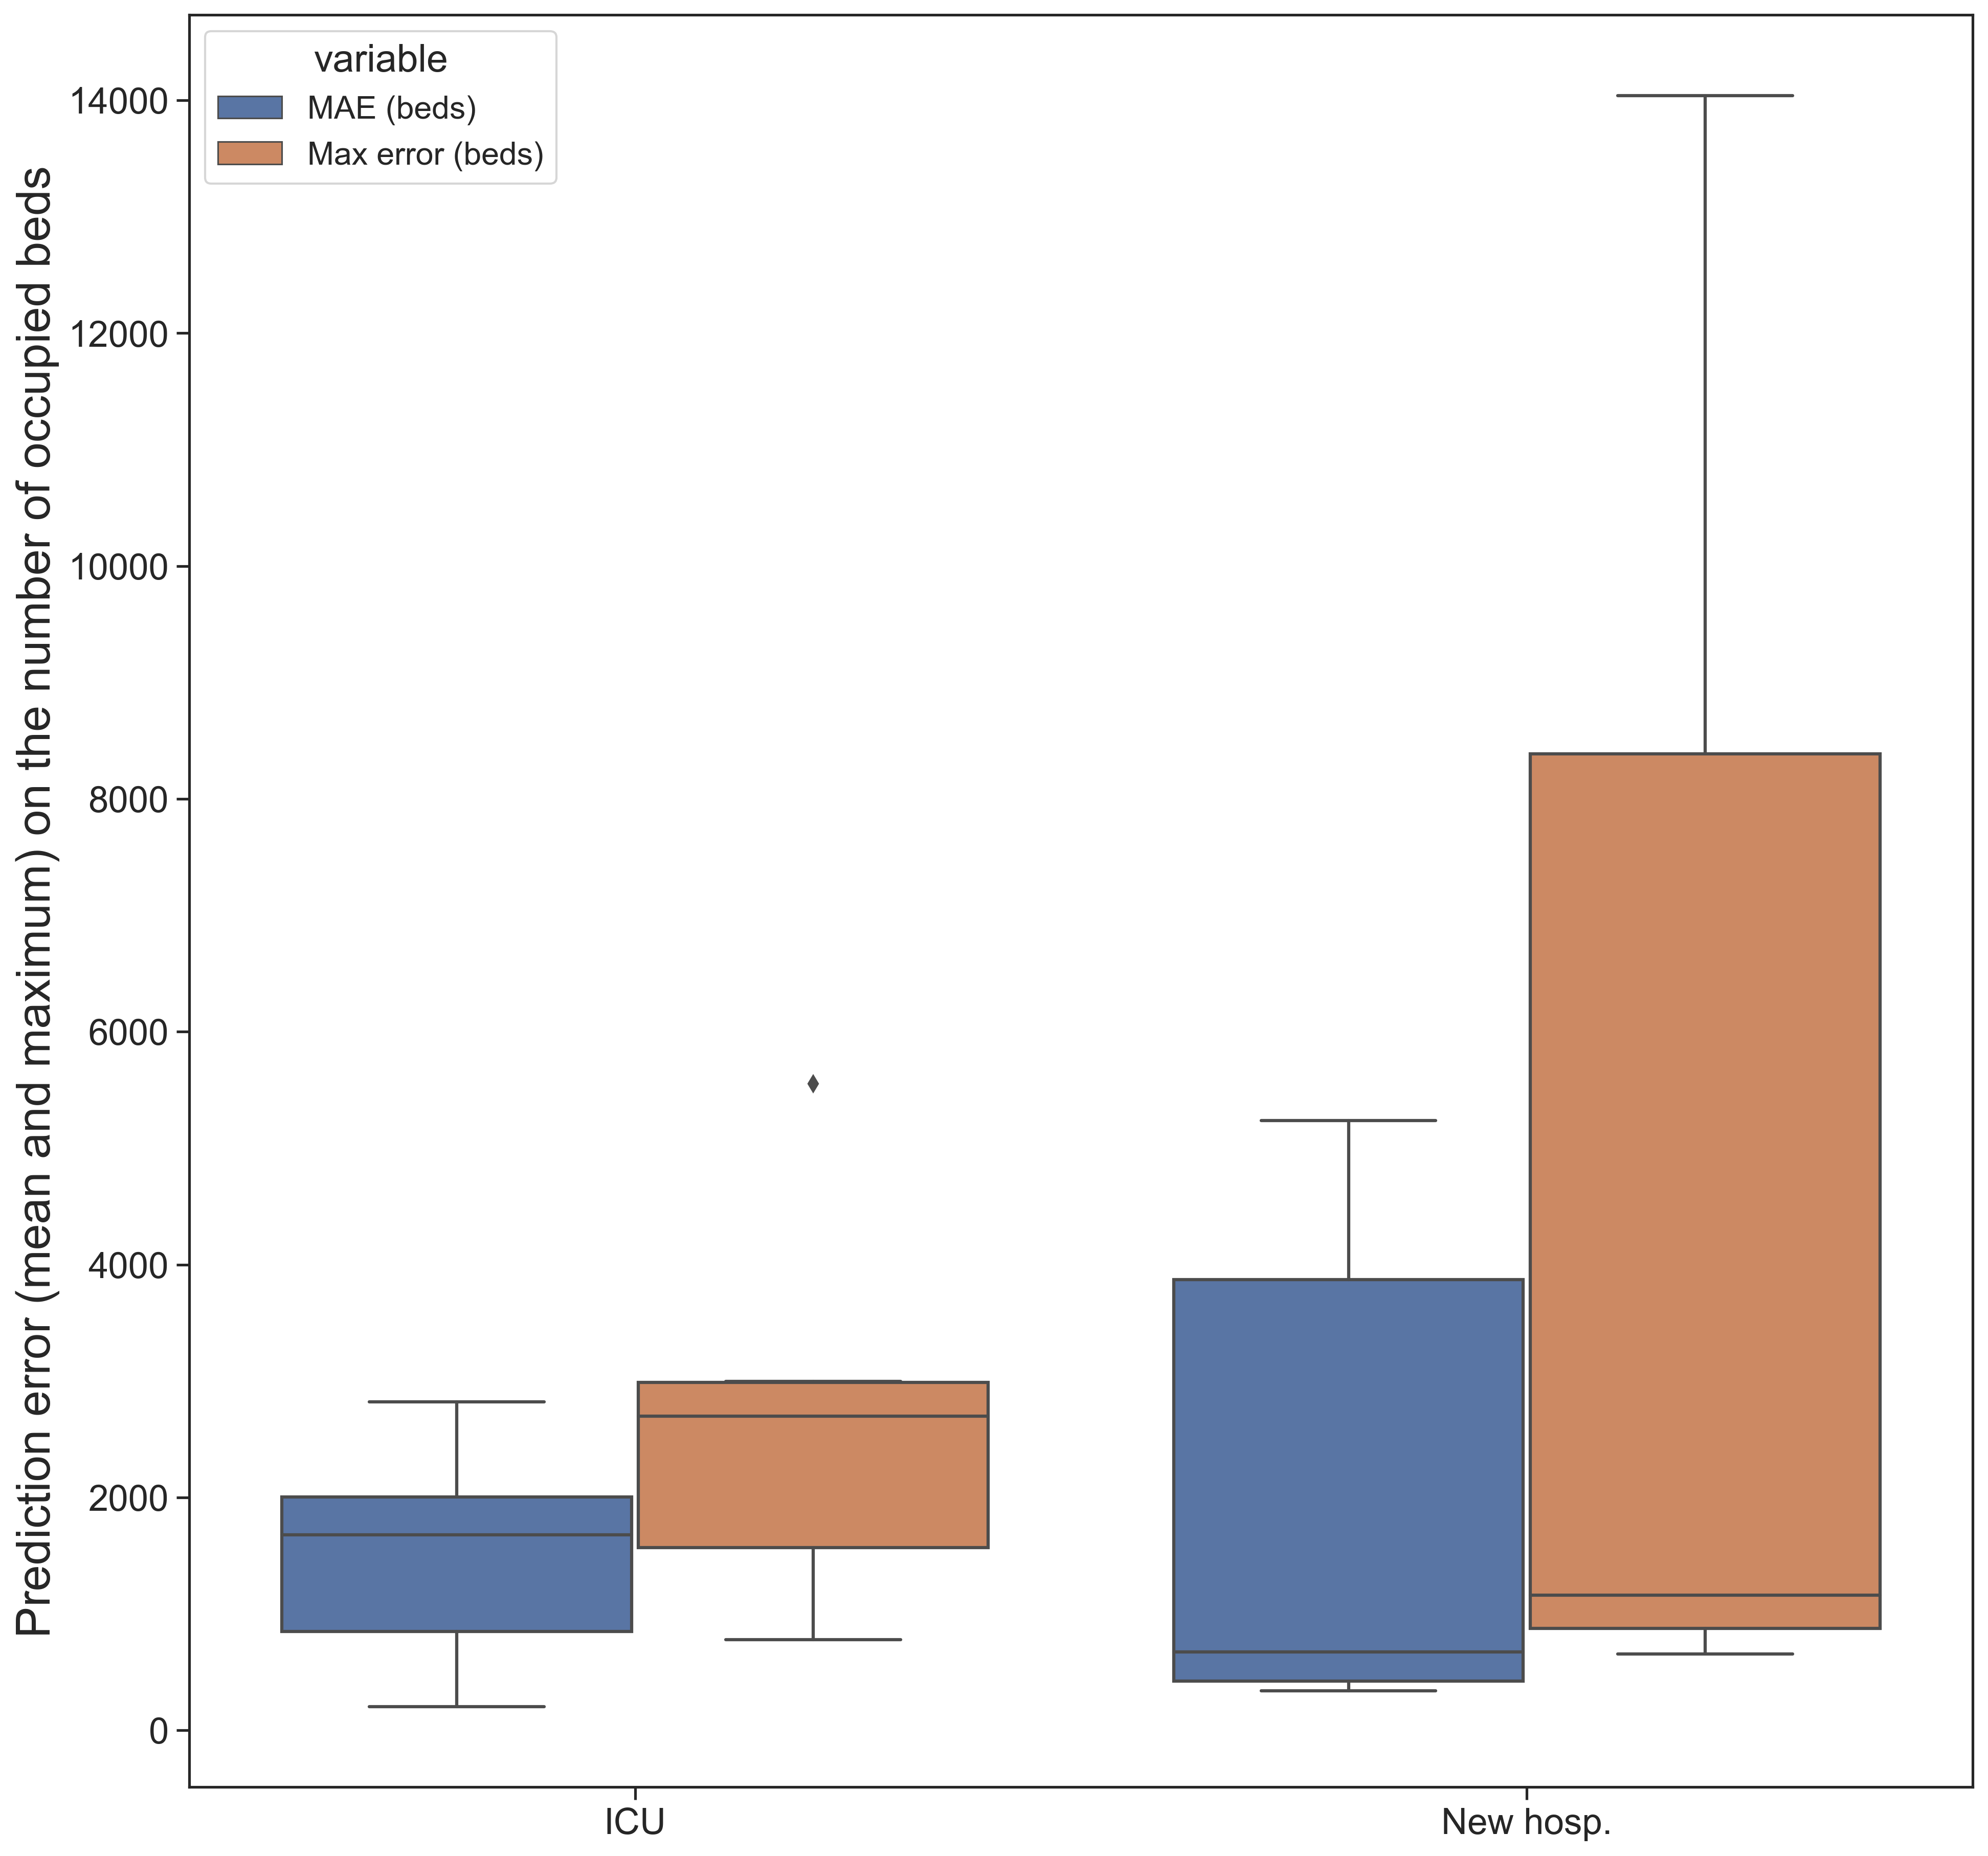

In [50]:
fig, ax = plt.subplots(figsize=(15, 15))
# x2 avec mean + x2 avec mae + mape

h = sns.boxplot(data=df_median_scenario.melt(id_vars='endpoints', value_vars=['MAE (beds)', 'Max error (beds)']), 
            x='endpoints', y='value', hue='variable')

# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
plt.xlabel("")
plt.ylabel("Prediction error (mean and maximum) on the number of occupied beds")
    
fig_path = images_path + '/error_beds_median.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

In [29]:
df_high_scenario = compute_metrics_all_scenarios(data_location, metrics=metrics, normalizations=normalizations, scenario_name="high")
df_high_scenario["endpoints"] = scenario_endpoints
df_high_scenario["MAE (beds)"] = df_high_scenario["MAE"].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])
df_high_scenario["Max error (beds)"] = df_high_scenario['Max Error'].values*np.array([endpoints_normalizations[x] for x in scenario_endpoints])

print(df_high_scenario.to_latex(
    formatters={"name": str.upper},
    float_format="{:.1f}".format)) 

\begin{tabular}{lrrrrlrr}
\toprule
{} &   MAE &    ME &  Max Error &  MAPE &  endpoints &  MAE (beds) &  Max error (beds) \\
\midrule
Scenario: 2020/04/29 &   9.4 &   7.7 &       35.3 & 188.5 &        ICU &       658.0 &            2471.0 \\
Scenario: 2020/10/30 &  48.4 &  48.4 &       83.3 &  96.4 &        ICU &      3388.0 &            5831.0 \\
Scenario: 2021/01/16 & 237.5 & 234.6 &      623.4 & 119.2 &  New hosp. &      9975.0 &           26182.8 \\
Scenario: 2021/02/02 & 199.9 & 199.9 &      454.7 & 100.8 &  New hosp. &      8395.8 &           19097.4 \\
Scenario: 2021/02/08 &  30.6 &  30.6 &       46.6 & 102.7 &  New hosp. &      1285.2 &            1957.2 \\
Scenario: 2021/02/23 &  15.8 &  12.6 &       55.8 &  42.3 &  New hosp. &       663.6 &            2343.6 \\
Scenario: 2021/04/26 &  20.3 &  20.3 &       35.2 & 376.3 &  New hosp. &       852.6 &            1478.4 \\
Scenario: 2021/05/21 &   9.2 &  -9.1 &       15.6 &  19.4 &  New hosp. &       386.4 &             655.2 \\
Sc

/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_26975/1864902589.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_high_scenario.to_latex(


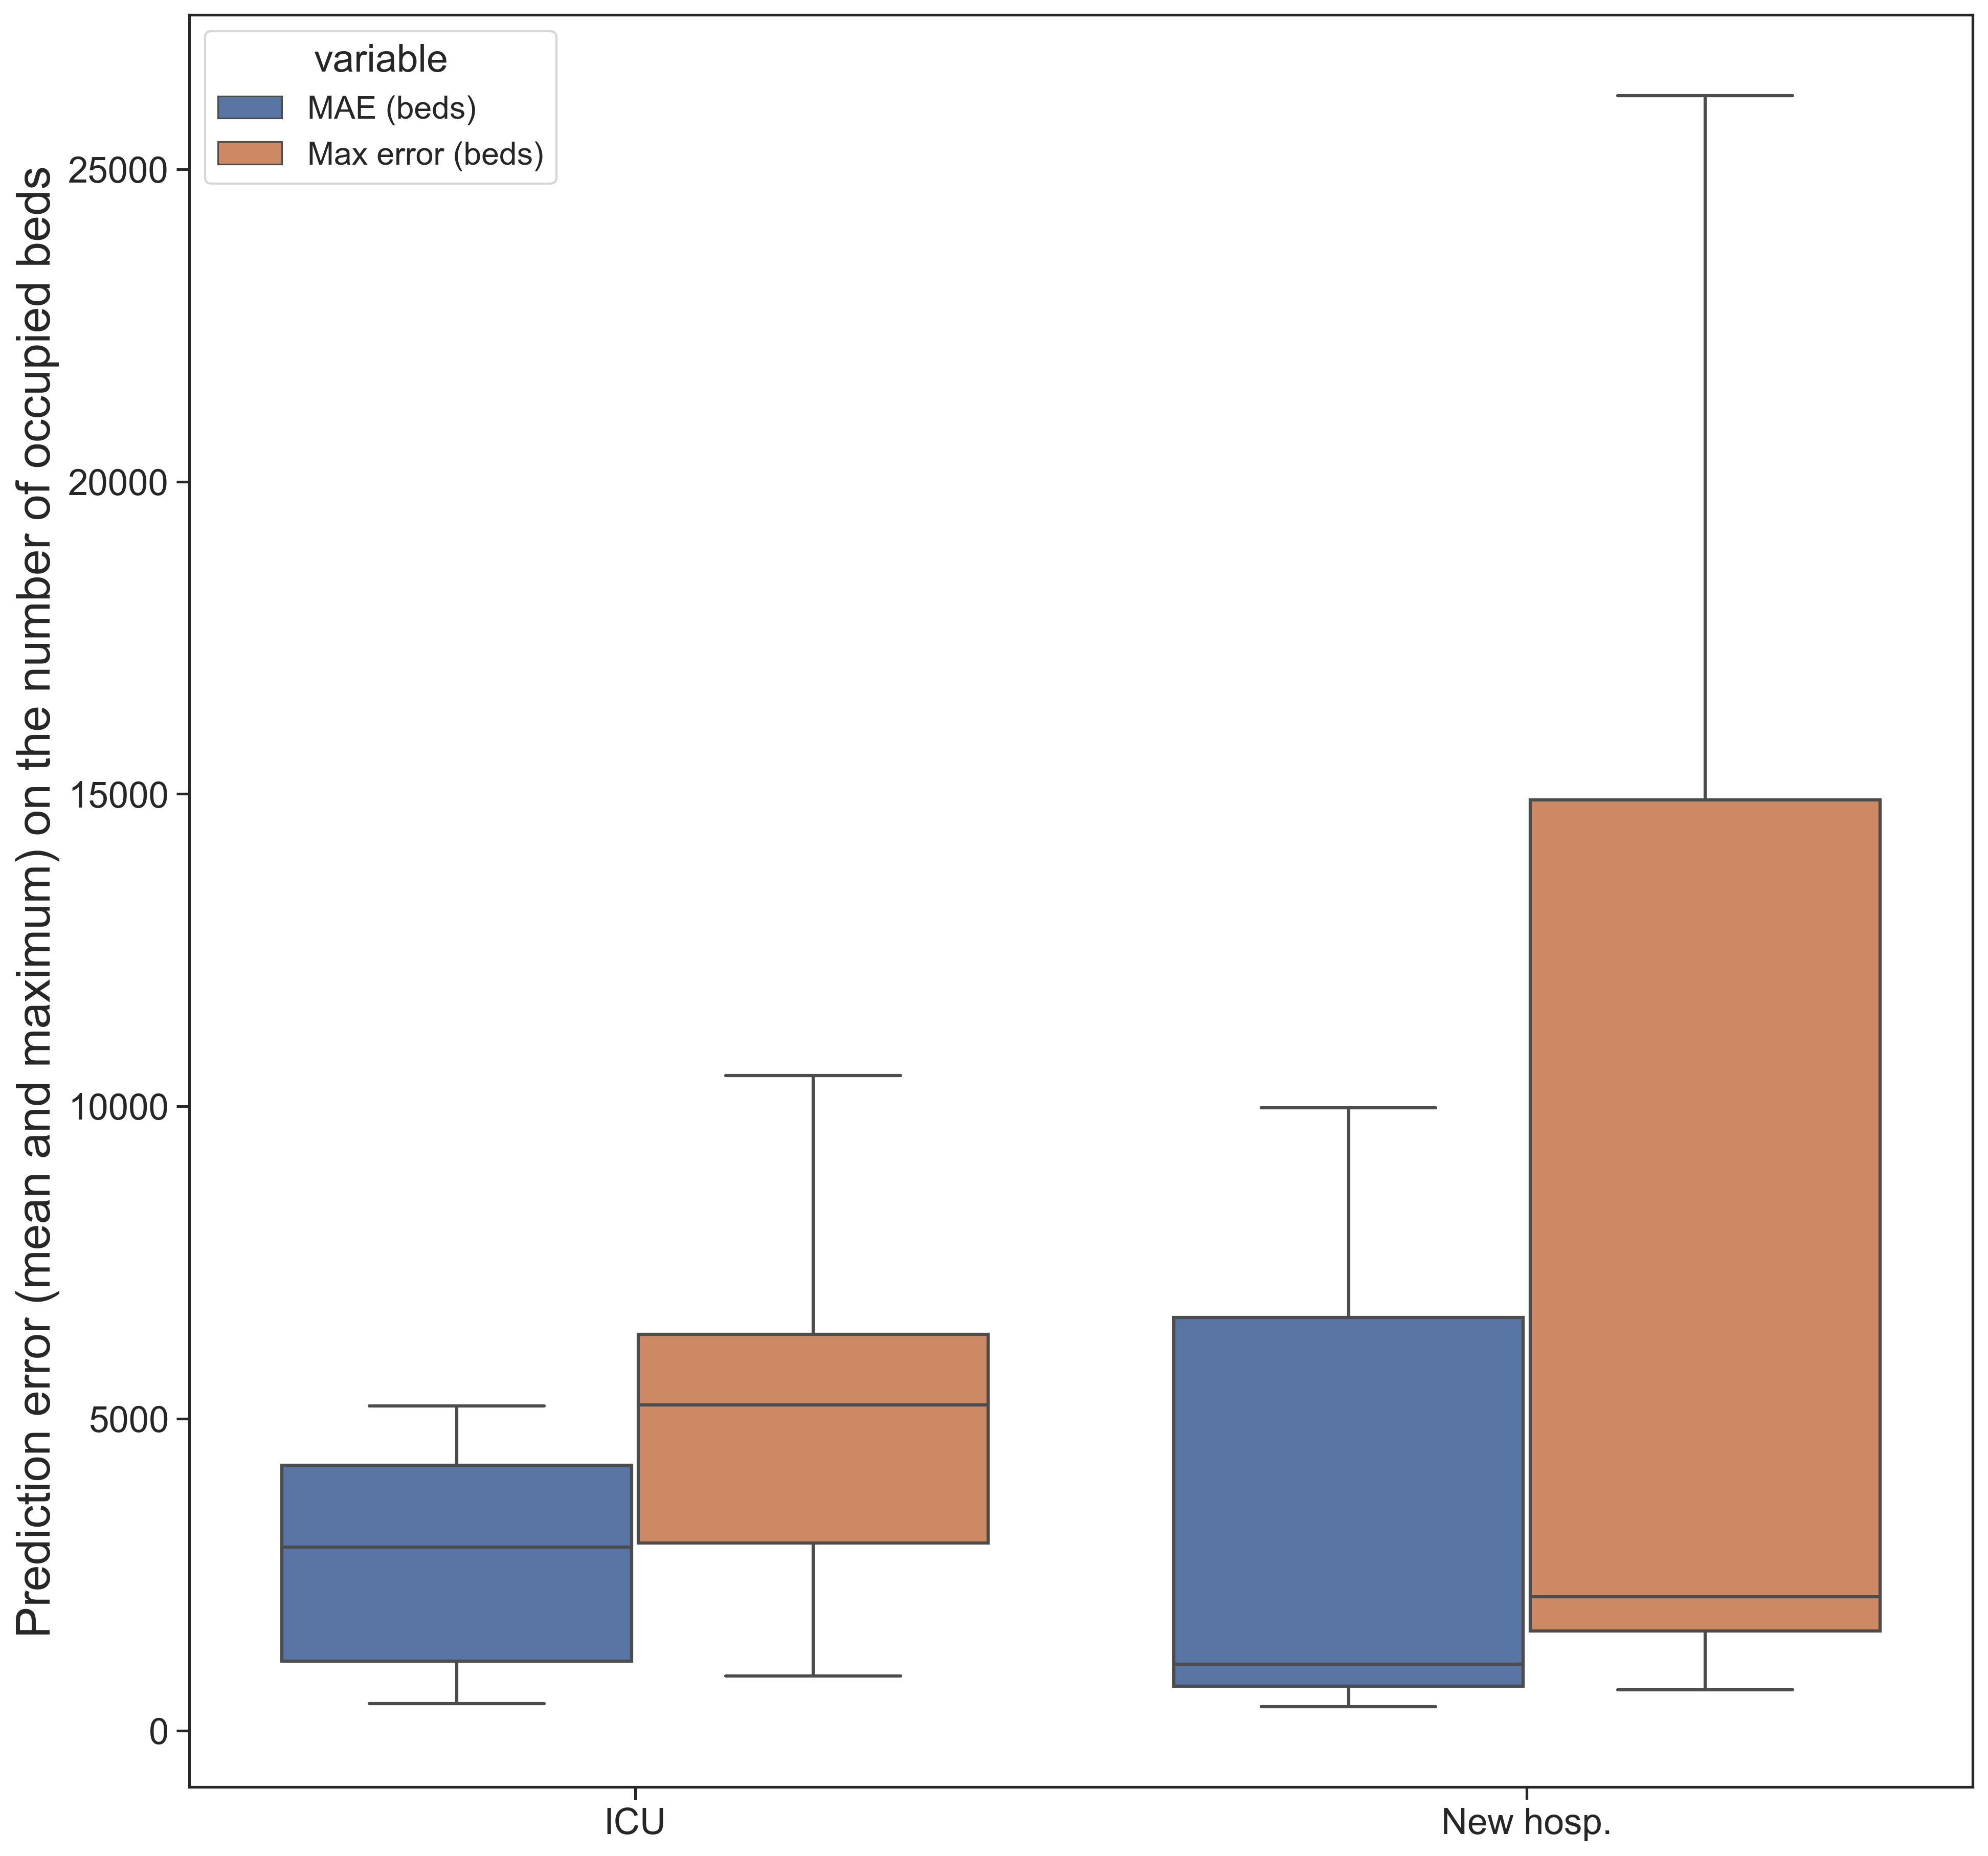

In [51]:
fig, ax = plt.subplots(figsize=(15, 15))
# x2 avec mean + x2 avec mae + mape


h = sns.boxplot(data=df_high_scenario.melt(id_vars='endpoints', value_vars=['MAE (beds)', 'Max error (beds)']), 
            x='endpoints', y='value', hue='variable')

# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
plt.xlabel("")
plt.ylabel("Prediction error (mean and maximum) on the number of occupied beds")
    
fig_path = images_path + '/error_beds_pessimist.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 15))
# x2 avec mean + x2 avec mae + mape

display_df = df_high_scenario.melt(id_vars='endpoints', value_vars=['MAE (beds)', 'Max error (beds)'])
h = sns.boxplot(data=display_df[display_df.endpoints=='ICU'], 
            x='endpoints', y='value', hue='variable')

# = sns.boxplot(data=df_median_scenario, y="Max error (beds)", ax=ax, x='endpoints')
plt.xlabel("")
plt.ylabel("Prediction error (mean and maximum) on the number of occupied beds")
    

/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_26975/3555579596.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom=0)
/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_26975/3555579596.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom=0)
/var/folders/nl/hpnwxlsd6xd8nq2vv1sr5pl80000gn/T/ipykernel_26975/3555579596.py:10: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom=0)


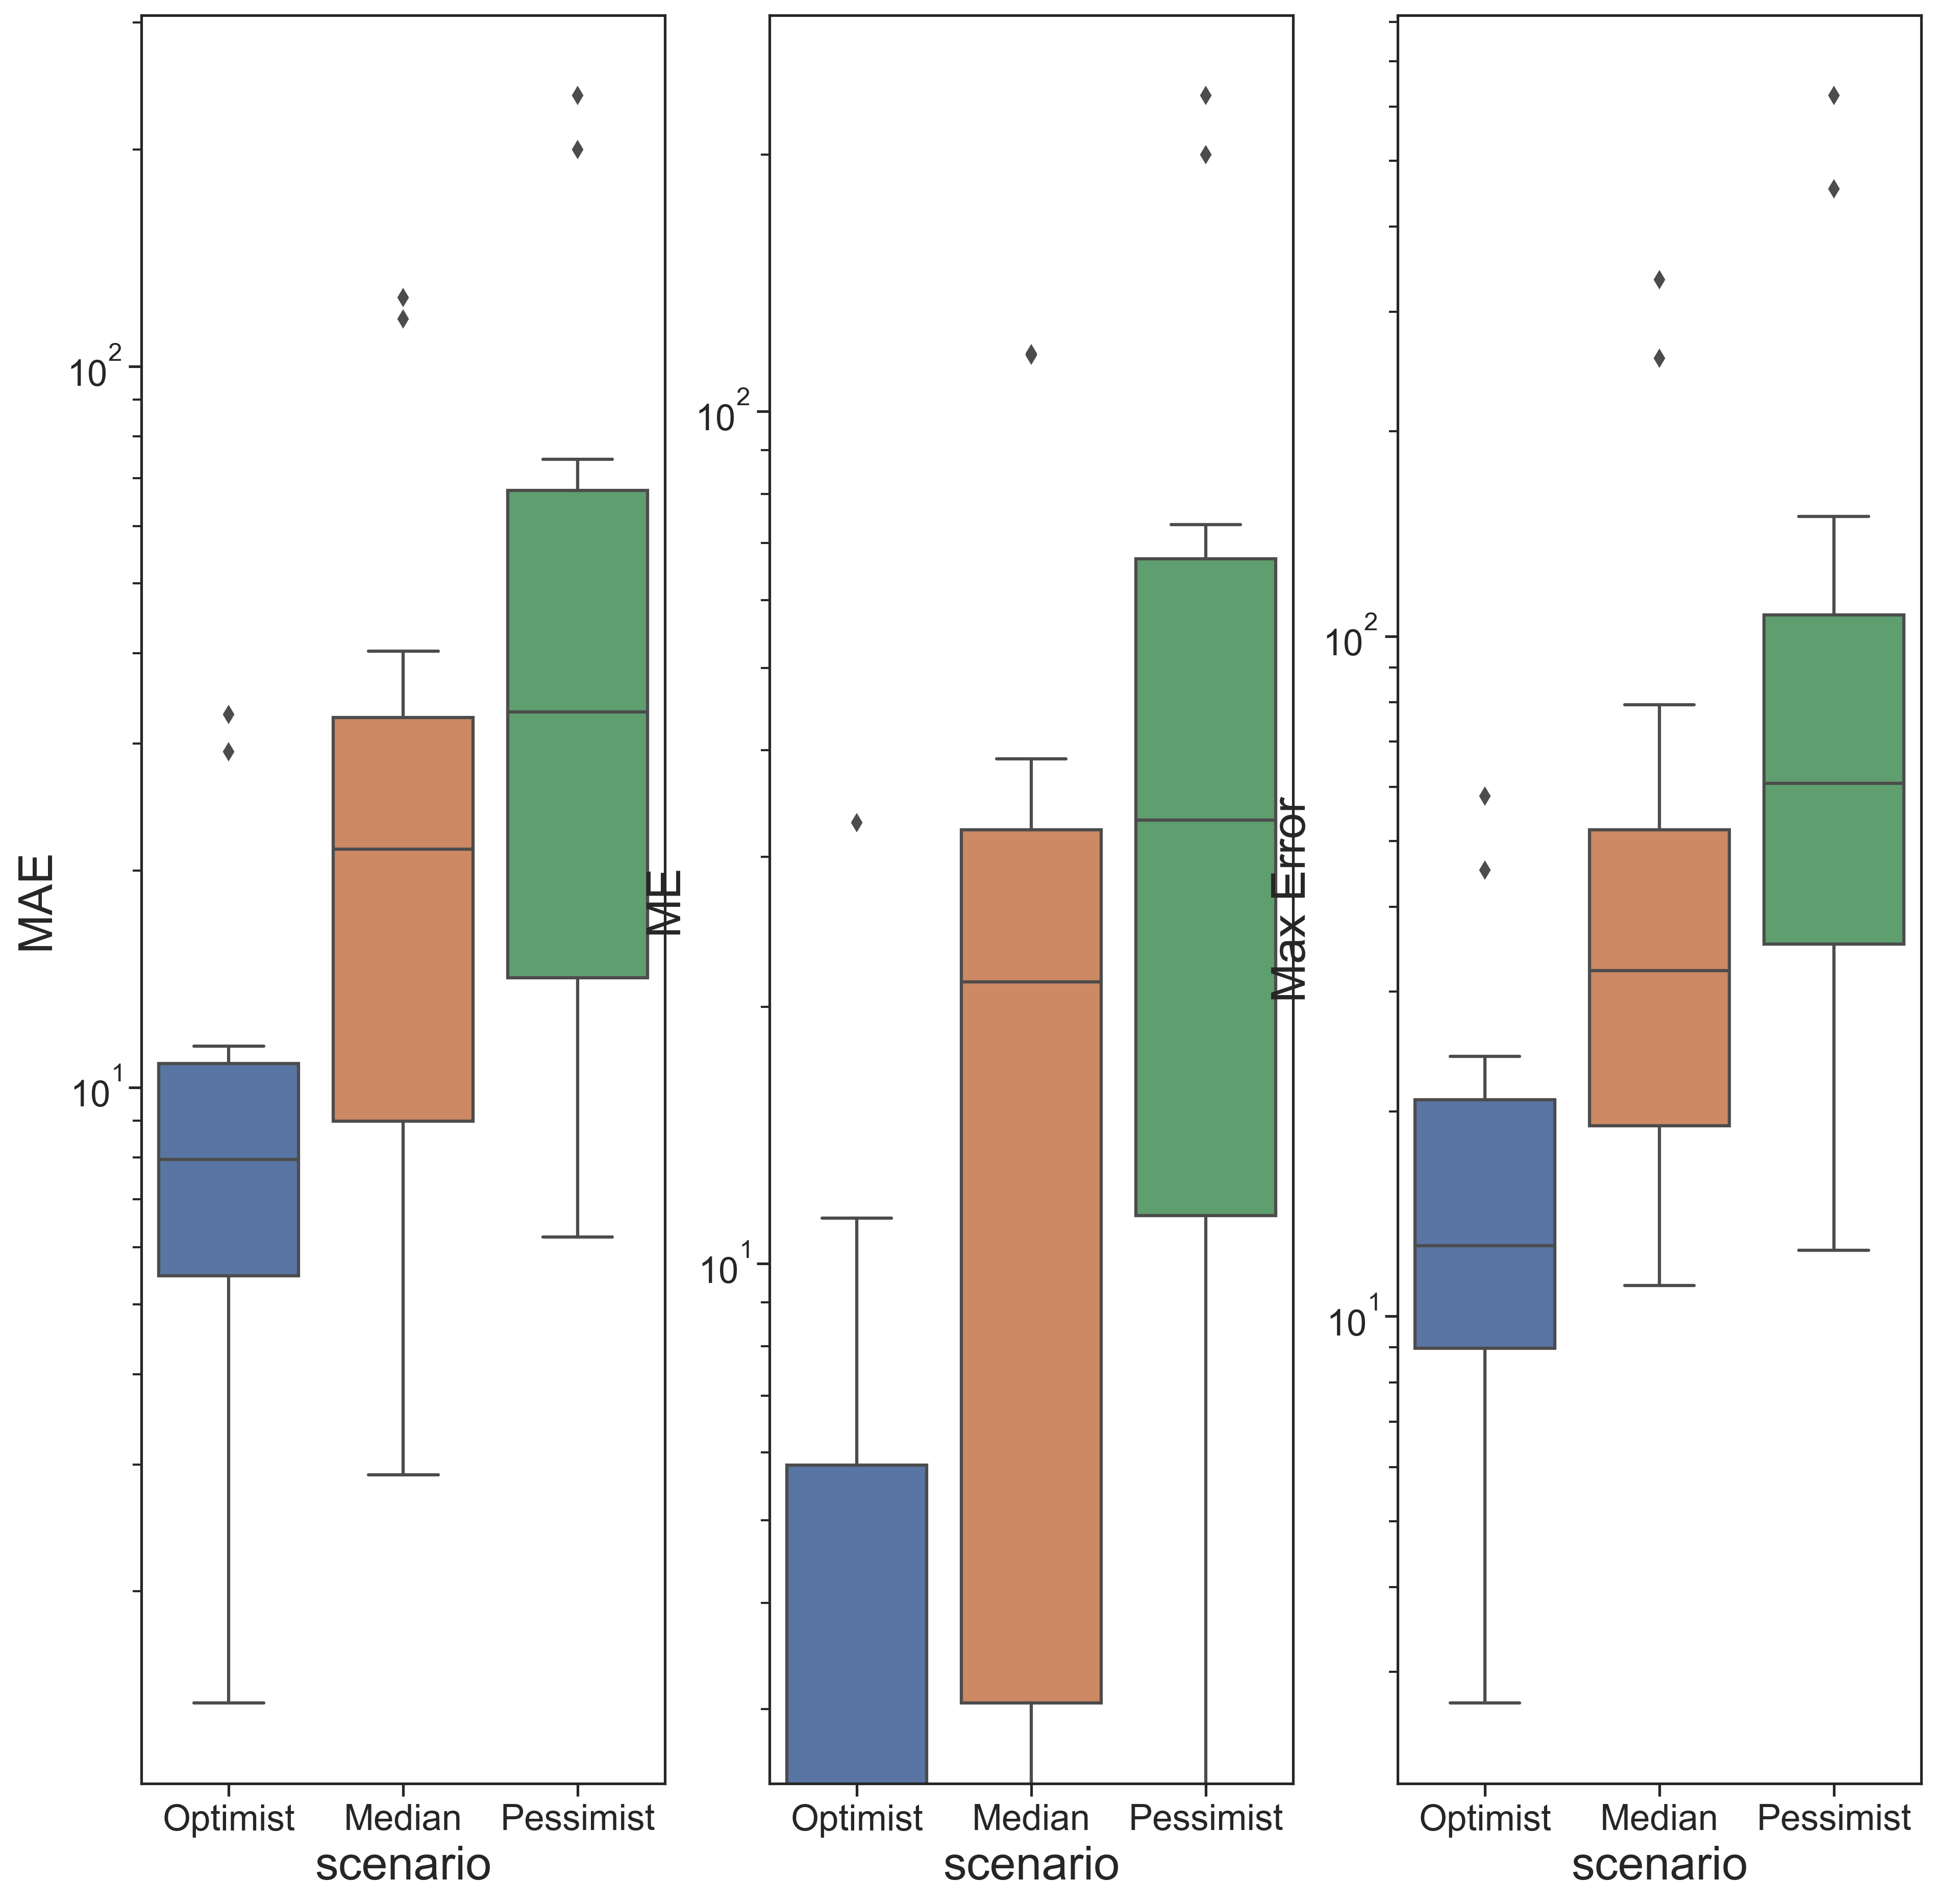

In [7]:
display_df = pd.concat([df_low_scenario.assign(scenario='Optimist'), df_median_scenario.assign(scenario='Median'),
                        df_high_scenario.assign(scenario='Pessimist')], axis=0)

endpoints = ["MAE", "ME", "Max Error"]
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    h = sns.boxplot(data=display_df, y=endpoints[i], x="scenario", ax=ax)
    h.set_yscale("log")
    ax.set_ylim(bottom=0)
    
fig_path = images_path + '/average_uncertainty.png'
plt.savefig(fig_path, dpi=300, bbox_inches='tight')